# Analysis of Scenario 3: Load Test
## Analysis of successively increasing concurrency

## Imports

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

## Parameters

In [2]:
# hey with 8 cores, docker with 4 cores
RESULTS_DIR = Path("../results/20251128_005820/10-seconds")

# using 3 service instances
# RESULTS_DIR = Path("../results/20251128_160731/10-seconds")

## Load Data

In [3]:
# load all csv files in the results directory
csv_files = list(RESULTS_DIR.glob("*.csv"))


print(f"Found csv files: {len(csv_files)}")
for f in csv_files:
    print(" -", f.name)

# read data
def load_hey_csv(path: Path):
    df = pd.read_csv(path)
    # file name for example: haproxy_http_5000_10.csv (gateway_protocol_numberOfRequests_concurrency)
    parts = path.stem.split("_")
    gateway = parts[0]
    protocol = parts[1]
    numberOfRequests = parts[2]
    concurrency = parts[3]
    df["gateway"] = gateway
    df["protocol"] = protocol
    df["numberOfRequests"] = numberOfRequests
    df["concurrency"] = concurrency
    return df


df = pd.concat([load_hey_csv(f) for f in csv_files], ignore_index=True)

df.sample()

Found csv files: 28
 - traefik_http_10s_64.csv
 - haproxy_http_10s_4.csv
 - nginx_http_10s_4.csv
 - nginx_http_10s_32.csv
 - haproxy_http_10s_1.csv
 - traefik_http_10s_8.csv
 - nginx_http_10s_1.csv
 - haproxy_http_10s_2.csv
 - nginx_http_10s_2.csv
 - tyk_http_10s_32.csv
 - tyk_http_10s_8.csv
 - haproxy_http_10s_32.csv
 - traefik_http_10s_16.csv
 - traefik_http_10s_32.csv
 - tyk_http_10s_4.csv
 - haproxy_http_10s_16.csv
 - nginx_http_10s_64.csv
 - tyk_http_10s_1.csv
 - tyk_http_10s_2.csv
 - tyk_http_10s_16.csv
 - tyk_http_10s_64.csv
 - nginx_http_10s_16.csv
 - traefik_http_10s_4.csv
 - haproxy_http_10s_8.csv
 - haproxy_http_10s_64.csv
 - traefik_http_10s_1.csv
 - nginx_http_10s_8.csv
 - traefik_http_10s_2.csv


,response-time,DNS+dialup,DNS,Request-write,Response-delay,Response-read,status-code,offset,gateway,protocol,numberOfRequests,concurrency
727596,0.0021,0.0003,0.0002,0.0,0.0016,0.0003,200,5.1208,haproxy,http,10s,16


## Response time to ms

In [4]:
df["response-time"] = df["response-time"] * 1000
df.sample()

,response-time,DNS+dialup,DNS,Request-write,Response-delay,Response-read,status-code,offset,gateway,protocol,numberOfRequests,concurrency
323996,0.8,0.0002,0.0001,0.0,0.0006,0.0,200,2.7126,haproxy,http,10s,2


In [5]:
# sort dataframe by concurrency (using integer sorting not string sorting)
df['concurrency'] = df['concurrency'].astype(int)

Plotting gateway: traefik


<Figure size 1000x600 with 0 Axes>

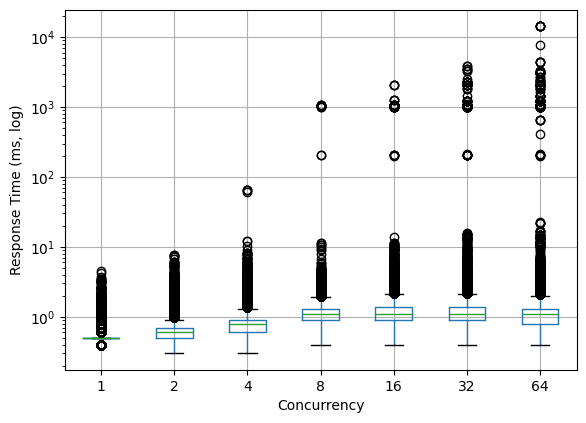

Plotting gateway: haproxy


<Figure size 1000x600 with 0 Axes>

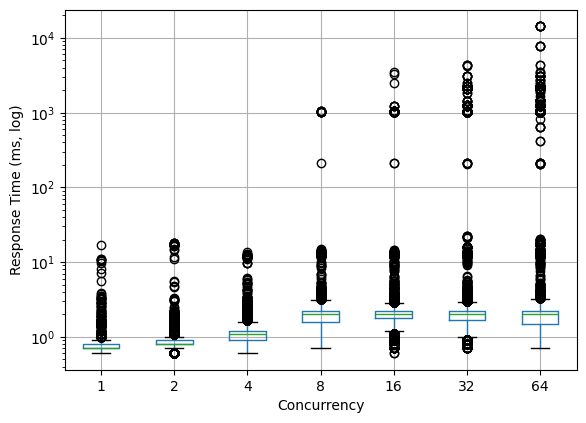

Plotting gateway: nginx


<Figure size 1000x600 with 0 Axes>

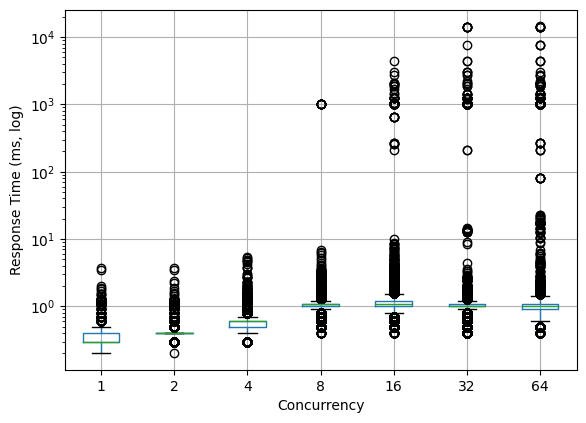

Plotting gateway: tyk


<Figure size 1000x600 with 0 Axes>

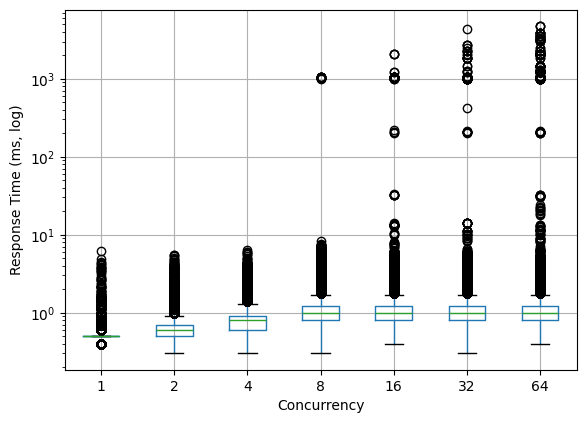

In [6]:
gateways = df["gateway"].unique()
for gateway in gateways:
    print(f"Plotting gateway: {gateway}")
    df_gateway = df[df["gateway"] == gateway]
    plt.figure(figsize=(10, 6))
    df_gateway.boxplot(column="response-time", by="concurrency")
    # df_gateway.boxplot(column="response-time", by="concurrency", showfliers=False)
    # plt.title(f"Response time by request concurrency for {gateway} (10 seconds each)")
    plt.title("")
    plt.suptitle("")
    plt.xlabel("Concurrency")
    plt.ylabel("Response Time (ms, log)")
    plt.yscale("log")
    plt.grid(True)
    plt.savefig(f"findings-scenario-3-requests-by-concurrency-{gateway}.png", dpi=300)
    plt.show()

In [7]:
# get count of requests per gateway and concurrency
for gateway in gateways:
    df_gateway = df[df["gateway"] == gateway]
    counts = df_gateway.groupby("concurrency").size()
    print(f"Counts for {gateway}:")
    print(counts)
    print()

Counts for traefik:
concurrency
1     18796
2     30504
4     44118
8     53053
16    52844
32    53322
64    51086
dtype: int64

Counts for haproxy:
concurrency
1     12982
2     23286
4     35912
8     36267
16    35488
32    36391
64    36075
dtype: int64

Counts for nginx:
concurrency
1     28599
2     52453
4     66933
8     65404
16    59005
32    69139
64    67820
dtype: int64

Counts for tyk:
concurrency
1     19439
2     32241
4     50264
8     60390
16    61344
32    63046
64    63084
dtype: int64

